In [1]:
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
import os 
from tqdm import tqdm
import cv2 as cv
import random
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50

# EDA

In [2]:
image_size = (128,128)
image_data = []
label_data = []
classes = {
    0:"Happy", 1:"Neutral", 2:"Sad"
}

In [3]:
label = 0
for i in os.listdir(os.path.join("Data")):
    print(i, label)
    for j in tqdm(os.listdir(os.path.join("Data", i))):
        try: 
            img = cv.imread(os.path.join("Data", i,j))
            img = cv.resize(img, image_size)
            image_data.append(img)
            label_data.append(label)
        except:
            pass
    label += 1

Happy 0


100%|███████████████████████████████████████████████████████████████████████████████| 903/903 [00:02<00:00, 328.84it/s]


Neutral 1


100%|███████████████████████████████████████████████████████████████████████████████| 736/736 [00:01<00:00, 388.45it/s]


Sad 2


100%|█████████████████████████████████████████████████████████████████████████████| 1042/1042 [00:02<00:00, 429.68it/s]


In [4]:
image_data = np.array(image_data)
label_data = np.array(label_data)
print(image_data.shape, label_data.shape)

(2680, 128, 128, 3) (2680,)


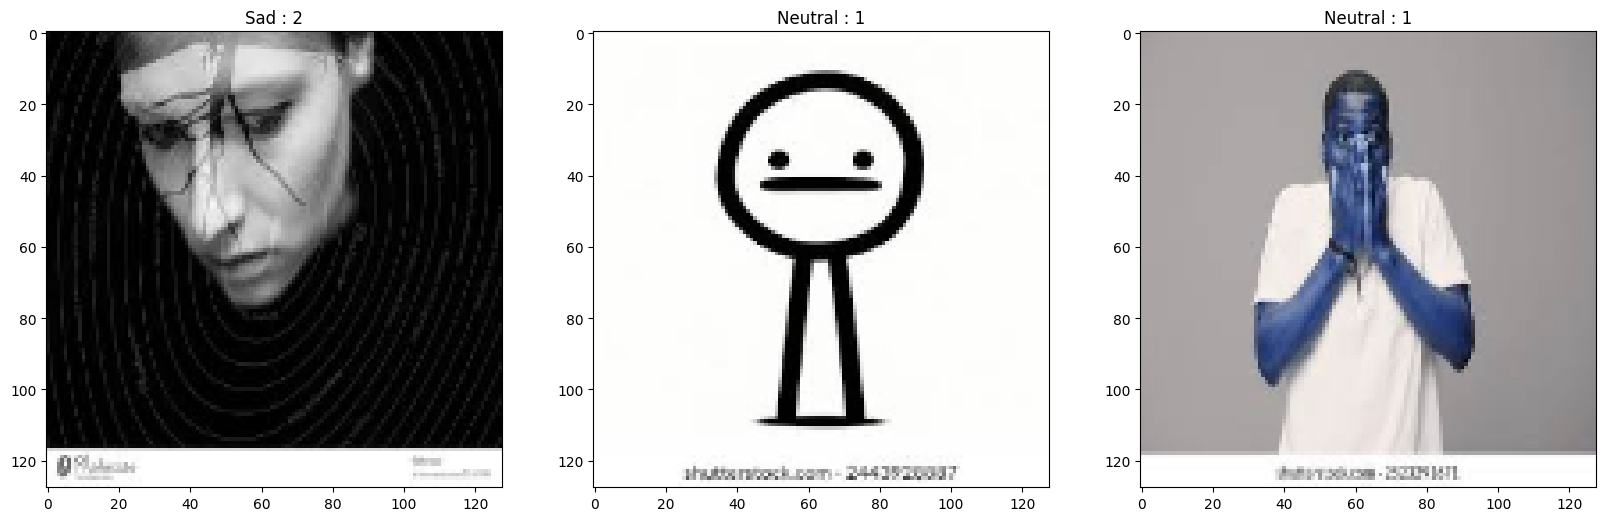

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i in range(3): 
    ran = random.randrange(image_data.shape[0])
    axes[i].imshow(image_data[ran])
    axes[i].set_title(f"{classes[label_data[ran]]} : {label_data[ran]}")

In [6]:
# Data processing
normalized_image = image_data / 255.0
normalized_image.shape

(2680, 128, 128, 3)

# Model

In [22]:
model = tf.keras.Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),        Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(500, activation="relu"),
    Dropout(0.3),
    Dense(100, activation="relu"),
    Dense(62, activation="relu"),
    Dense(32, activation="relu"),
    Dense(len(classes), activation="softmax")  # Use softmax for multi-class classification
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 124, 124, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 124, 124, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │       3,136,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 62)                  │           6,262 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,345,345 (12.76 MB)

 Trainable params: 3,344,897 (12.76 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
hist = model.fit(x = image_data, y = label_data, epochs = 10, batch_size = 64, validation_split = 0.1)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 252s 6s/step - accuracy: 0.4224 - loss: 1.2687 - val_accuracy: 0.6828 - val_loss: 0.6520
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.5259 - loss: 0.9939 - val_accuracy: 0.5261 - val_loss: 0.7599
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 221s 6s/step - accuracy: 0.6065 - loss: 0.8799 - val_accuracy: 0.1231 - val_loss: 1.3728
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 223s 6s/step - accuracy: 0.6683 - loss: 0.7851 - val_accuracy: 0.3657 - val_loss: 1.0457
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 220s 6s/step - accuracy: 0.6727 - loss: 0.7376 - val_accuracy: 0.3769 - val_loss: 1.2060
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.7646 - loss: 0.6048 - val_accuracy: 0.4403 - val_loss: 1.1346
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 0.7550 - loss: 0.5850 - val_accuracy: 0.6866 - val_loss: 0.7940
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 235s 6s/step - accuracy: 0.8298 - loss: 0.4646 - val_accuracy: 0.7351 - v

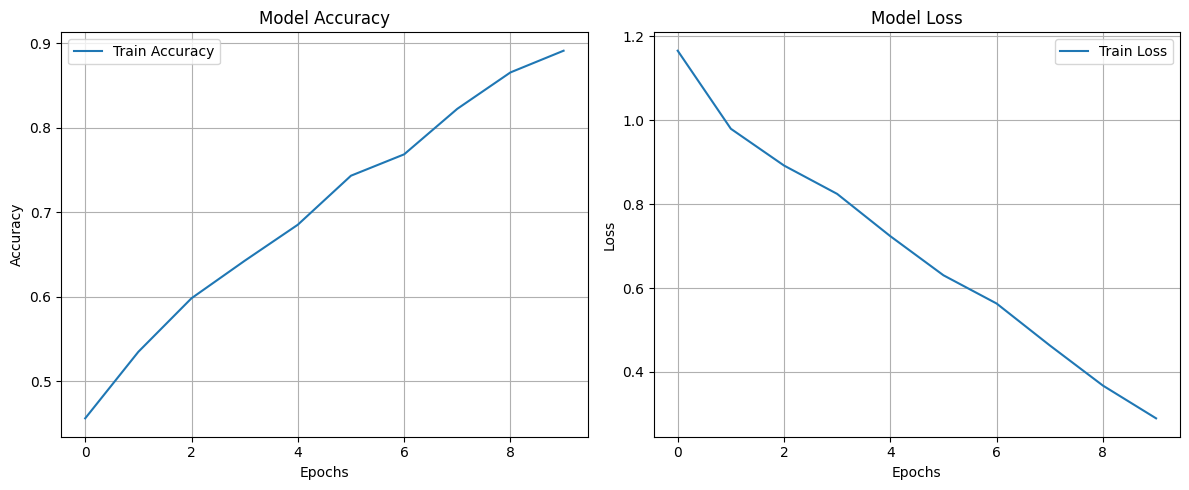

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [27]:
model.save("best_model.h5")